In [53]:
##We load the packages used at the work
##We are going to use as rule pd for Pandas
##If you are going to use Matplotlib, Numpy or
##other, you should search how to name them 
## as rule.
##For keep the order you can use prettier
## in vscode

##Pandas is similar to tidyverse
import pandas as pd 
##The next package is used to format tables
##In the next lines you can watch how to use it
from tabulate import tabulate

import numpy as np

import seaborn as sns

##La tabla que vamos a emplear es esta, las demás han
##sido eliminadas
file="SouthGermanCredit.asc"
data=pd.read_csv(file," ")

##We are going to change the name of the variables 
##because in German is difficult to us work.
names={'laufkont':'Status',
        'laufzeit':'Duracion',
        'moral':'Historial_Crediticio',
        'verw':'Proposito',
        'hoehe':'Monto',
        'sparkont':'Ahorros',
        'beszeit':'Tiempo_trabajando',
        'rate':'Porcentaje_salario',
        'famges':'Estado_civil_sexo',
        'buerge':'Otros_deudores',
        'wohnzeit':'Residencia',
        'verm':'Propiedad_valiosa',
        'alter':'Edad',
        'weitkred':'Otras_deudas',
        'wohn':'Residencia',
        'bishkred':'Creditos_banco',
        'beruf':'Empleo',
        'pers':'Personas_dependientes',
        'telef':'Telefono',
        'gastarb':'Extranjero',
        'kredit':'Default',}


data.rename(columns=names,inplace=True)
print(data.head(5))
#print(tabulate(data.head(5),headers='keys',tablefmt='latex_longtable'))


   Status  Duracion  Historial_Crediticio  Proposito  Monto  Ahorros  \
0       1        18                     4          2   1049        1   
1       1         9                     4          0   2799        1   
2       2        12                     2          9    841        2   
3       1        12                     4          0   2122        1   
4       1        12                     4          0   2171        1   

   Tiempo_trabajando  Porcentaje_salario  Estado_civil_sexo  Otros_deudores  \
0                  2                   4                  2               1   
1                  3                   2                  3               1   
2                  4                   2                  2               1   
3                  3                   3                  3               1   
4                  3                   4                  3               1   

   ...  Propiedad_valiosa  Edad  Otras_deudas  Residencia  Creditos_banco  \
0  ...         

C:\Users\Moises Monge\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
##It's contructed a table of min and max of all to know if 
##the data doesn't have mistakes
data_1=data.agg(['min','max'])
print(tabulate(data_1.transpose(),headers='keys',tablefmt='latex_longtable'))

\begin{longtable}{lrr}
\hline
                       &   min &   max \\
\hline
\endhead
 Status                &     1 &     4 \\
 Duracion              &     4 &    72 \\
 Historial\_Crediticio  &     0 &     4 \\
 Proposito             &     0 &    10 \\
 Monto                 &   250 & 18424 \\
 Ahorros               &     1 &     5 \\
 Tiempo\_trabajando     &     1 &     5 \\
 Porcentaje\_salario    &     1 &     4 \\
 Estado\_civil\_sexo     &     1 &     4 \\
 Otros\_deudores        &     1 &     3 \\
 Residencia            &     1 &     4 \\
 Propiedad\_valiosa     &     1 &     4 \\
 Edad                  &    19 &    75 \\
 Otras\_deudas          &     1 &     3 \\
 Residencia            &     1 &     3 \\
 Creditos\_banco        &     1 &     4 \\
 Empleo                &     1 &     4 \\
 Personas\_dependientes &     1 &     2 \\
 Telefono              &     1 &     2 \\
 Extranjero            &     1 &     2 \\
 Default               &     0 &     1 \\
\hline
\end{longtabl

In [ ]:
##We are going to construct the tables
##We are going to do a resume of five numbers
##Duracion, Monto, Edad
##First we select this three columns
##This new variable is the data.frame with,
##what we want
data_2=data[['Duracion','Edad','Monto','Tiempo_trabajando']]

summary_2=data_2.describe().transpose()
summary_2=summary_2.loc[:,summary_2.columns!='count']



print(tabulate(summary_2,headers='keys',tablefmt='latex_longtable'))

\begin{longtable}{lrrrrrrr}
\hline
                   &     mean &        std &   min &    25\% &    50\% &     75\% &   max \\
\hline
\endhead
 Duracion          &   20.903 &   12.0588  &     4 &   12   &   18   &   24    &    72 \\
 Edad              &   35.542 &   11.3527  &    19 &   27   &   33   &   42    &    75 \\
 Monto             & 3271.25  & 2822.75    &   250 & 1365.5 & 2319.5 & 3972.25 & 18424 \\
 Tiempo\_trabajando &    3.384 &    1.20831 &     1 &    3   &    3   &    5    &     5 \\
\hline
\end{longtable}


In [ ]:
##A table count historial and default
historial_default=pd.crosstab(index=data['Default'],columns=data['Historial_Crediticio'],margins=True)
print(tabulate(historial_default,headers='keys',tablefmt='latex_longtable'))

\begin{longtable}{lrrrrrr}
\hline
 Default   &   0 &   1 &   2 &   3 &   4 &   All \\
\hline
\endhead
 0         &  25 &  28 & 169 &  28 &  50 &   300 \\
 1         &  15 &  21 & 361 &  60 & 243 &   700 \\
 All       &  40 &  49 & 530 &  88 & 293 &  1000 \\
\hline
\end{longtable}


In [ ]:
##A table count savings and default
savings_default=pd.crosstab(index=data['Default'],columns=data['Ahorros'])
print(tabulate(savings_default,headers='keys',tablefmt='latex_longtable'))

\begin{longtable}{rrrrrr}
\hline
   Default &   1 &   2 &   3 &   4 &   5 \\
\hline
\endhead
         0 & 217 &  34 &  11 &   6 &  32 \\
         1 & 386 &  69 &  52 &  42 & 151 \\
\hline
\end{longtable}


Se procede a generar un histograma sobre las edades de las personas y clasificando de acuerdo a su estado de default o no default

<AxesSubplot:ylabel='Frequency'>

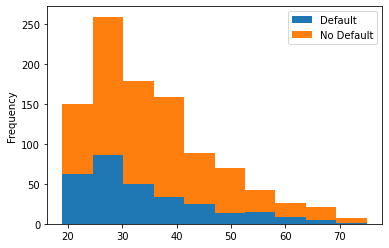

In [ ]:
pd.DataFrame({'Default': data.groupby('Default').get_group(0).Edad,'No Default':   data.groupby('Default').get_group(1).Edad}).plot.hist(stacked=True)

    Porcentaje_salario  Historial_Crediticio  Edad
0                    1                     0     6
1                    1                     1     7
2                    1                     2    76
3                    1                     3    12
4                    1                     4    35
5                    2                     0    14
6                    2                     1     8
7                    2                     2   121
8                    2                     3    22
9                    2                     4    66
10                   3                     0     7
11                   3                     1     6
12                   3                     2    86
13                   3                     3    15
14                   3                     4    43
15                   4                     0    13
16                   4                     1    28
17                   4                     2   247
18                   4         

<AxesSubplot:xlabel='Porcentaje_salario', ylabel='Historial_Crediticio'>

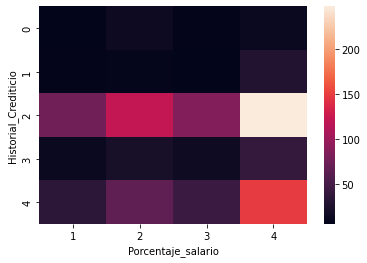

In [89]:

#data_4 = pd.DataFrame({'Duracion': data.groupby('Duracion').get_group(0).Historial_Crediticio})

data_5=data[['Proposito','Historial_Crediticio','Edad']]

data_6= data_5.groupby(['Proposito','Historial_Crediticio'], as_index=False)["Edad"].count()



#data_7 = pd.DataFrame(data_6, columns=['Duracion', 'Historial Crediticio','Conteo'])

print(data_6)

df2=data_6.pivot(index='Historial_Crediticio', columns='Proposito', values='Edad')
df2

df2.fillna(0)

#data_5_melt=pd.melt(data_5, id_vars=[‘Duracion’],value_vars=[‘Historial_Crediticio’],var_name=’DurationType’,value_name=’Duration’)
#data_5_melt

print(df2)
#print(data_6)
#data_3=data[['Historial_Crediticio','Duracion']]
#print(data_4)
#sns.heatmap(data_3)

#data_5= data.groupby("", sort=False)["last_name"].count()

#data_3=data[['Historial_Crediticio','Duracion']]
#print(data_4)
sns.heatmap(df2)